In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [141]:
data = pd.read_csv('Financial market statistics.csv', skiprows=9)
data = data.iloc[1:27,:].transpose()
data.columns = data.iloc[0]
data = data.iloc[1:,:]
data

Rates            Bank rate  \
March 8, 1972           ..   
March 15, 1972          ..   
March 22, 1972          ..   
March 29, 1972          ..   
April 5, 1972           ..   
...                    ...   
October 5, 2022       3.50   
October 12, 2022      3.50   
October 19, 2022      3.50   
October 26, 2022        ..   
November 2, 2022      4.00   

Rates            Chartered bank administered interest rates - Prime rate 1  \
March 8, 1972                                                    ..          
March 15, 1972                                                   ..          
March 22, 1972                                                   ..          
March 29, 1972                                                   ..          
April 5, 1972                                                    ..          
...                                                             ...          
October 5, 2022                                                5.45          
October 12, 2022                                               5.45          
October 19, 2022                                               5.45          
October 26, 2022                                                 ..          
November 2, 2022                                               5.95          

Rates            Chartered bank - consumer loan rate 1  \
March 8, 1972                                       ..   
March 15, 1972                                      ..   
March 22, 1972                                      ..   
March 29, 1972                                      ..   
April 5, 1972                                       ..   
...                                                ...   
October 5, 2022                                  10.00   
October 12, 2022                                 10.00   
October 19, 2022                                 10.00   
October 26, 2022                                    ..   
November 2, 2022                                 10.00   

Rates            Overnight money market financing, 7 day average 2  \
March 8, 1972                                                   ..   
March 15, 1972                                                  ..   
March 22, 1972                                                  ..   
March 29, 1972                                                  ..   
April 5, 1972                                                   ..   
...                                                            ...   
October 5, 2022                                             3.2294   
October 12, 2022                                            3.2415   
October 19, 2022                                            3.2387   
October 26, 2022                                                ..   
November 2, 2022                                            3.7383   

Rates            Government of Canada marketable bonds, average yield: 1-3 year 3  \
March 8, 1972                                                  5.18                 
March 15, 1972                                                 5.45                 
March 22, 1972                                                 5.54                 
March 29, 1972                                                 5.51                 
April 5, 1972                                                  5.67                 
...                                                             ...                 
October 5, 2022                                                3.83                 
October 12, 2022                                               4.01                 
October 19, 2022                                               4.18                 
October 26, 2022                                                 ..                 
November 2, 2022                                               3.93                 

Rates            Government of Canada marketable bonds, average yield: 3-5 year 3  \
March 8, 1972                                             

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2644 entries, March 8, 1972 to November 2, 2022
Data columns (total 26 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Bank rate                                                              2644 non-null   object
 1   Chartered bank administered interest rates - Prime rate 1              2644 non-null   object
 2   Chartered bank - consumer loan rate 1                                  2644 non-null   object
 3   Overnight money market financing, 7 day average 2                      2644 non-null   object
 4   Government of Canada marketable bonds, average yield: 1-3 year 3       2644 non-null   object
 5   Government of Canada marketable bonds, average yield: 3-5 year 3       2644 non-null   object
 6   Government of Canada marketable bonds, average yield: 5-10 year 3      2644 n

In [143]:
#replace .. with zero and convert objects to floats

data = data.replace(to_replace='..', value=0)
data = data.astype(float)
data.tail(4)

Rates             Bank rate  \
October 12, 2022        3.5   
October 19, 2022        3.5   
October 26, 2022        0.0   
November 2, 2022        4.0   

Rates             Chartered bank administered interest rates - Prime rate 1  \
October 12, 2022                                               5.45           
October 19, 2022                                               5.45           
October 26, 2022                                               0.00           
November 2, 2022                                               5.95           

Rates             Chartered bank - consumer loan rate 1  \
October 12, 2022                                   10.0   
October 19, 2022                                   10.0   
October 26, 2022                                    0.0   
November 2, 2022                                   10.0   

Rates             Overnight money market financing, 7 day average 2  \
October 12, 2022                                             3.2415   
October 19, 2022                                             3.2387   
October 26, 2022                                             0.0000   
November 2, 2022                                             3.7383   

Rates             Government of Canada marketable bonds, average yield: 1-3 year 3  \
October 12, 2022                                               4.01                  
October 19, 2022                                               4.18                  
October 26, 2022                                               0.00                  
November 2, 2022                                               3.93                  

Rates             Government of Canada marketable bonds, average yield: 3-5 year 3  \
October 12, 2022                                               3.67                  
October 19, 2022                                               3.83                  
October 26, 2022                                               0.00                  
November 2, 2022                                               3.59                  

Rates             Government of Canada marketable bonds, average yield: 5-10 year 3  \
October 12, 2022                                               3.45                   
October 19, 2022                                               3.57                   
October 26, 2022                                               0.00                   
November 2, 2022                                               3.33                   

Rates             Government of Canada marketable bonds, average yield: over 10 years 3  \
October 12, 2022                                               3.42                       
October 19, 2022                                               3.58                       
October 26, 2022                                               0.00                       
November 2, 2022                                               3.37                       

Rates             Chartered banks - 90 day term deposits 1  \
October 12, 2022                                      1.25   
October 19, 2022                                      1.25   
October 26, 2022                                      0.00   
November 2, 2022                                      1.25   

Rates             Chartered bank - conventional mortgage: 1 year 1  ...  \
October 12, 2022                                              6.09  ...   
October 19, 2022                                              6.09  ...   
October 26, 2022                                              0.00  ...   
November 2, 2022                                              6.09  ...   

Rates             Chartered bank - Guaranteed Investment Certificates: 3 year 1  \
October 12, 2022                                               2.75               
October 19, 2022                                               2.75               
October 26, 2022                                               0.00               
November 2, 2022       

In [144]:
b_data = data.iloc[:,[0,1,2,3,9,10,11,12,13,14,23]]
b_data

Rates             Bank rate  \
March 8, 1972           0.0   
March 15, 1972          0.0   
March 22, 1972          0.0   
March 29, 1972          0.0   
April 5, 1972           0.0   
...                     ...   
October 5, 2022         3.5   
October 12, 2022        3.5   
October 19, 2022        3.5   
October 26, 2022        0.0   
November 2, 2022        4.0   

Rates             Chartered bank administered interest rates - Prime rate 1  \
March 8, 1972                                                  0.00           
March 15, 1972                                                 0.00           
March 22, 1972                                                 0.00           
March 29, 1972                                                 0.00           
April 5, 1972                                                  0.00           
...                                                             ...           
October 5, 2022                                                5.45           
October 12, 2022                                               5.45           
October 19, 2022                                               5.45           
October 26, 2022                                               0.00           
November 2, 2022                                               5.95           

Rates             Chartered bank - consumer loan rate 1  \
March 8, 1972                                       0.0   
March 15, 1972                                      0.0   
March 22, 1972                                      0.0   
March 29, 1972                                      0.0   
April 5, 1972                                       0.0   
...                                                 ...   
October 5, 2022                                    10.0   
October 12, 2022                                   10.0   
October 19, 2022                                   10.0   
October 26, 2022                                    0.0   
November 2, 2022                                   10.0   

Rates             Overnight money market financing, 7 day average 2  \
March 8, 1972                                                0.0000   
March 15, 1972                                               0.0000   
March 22, 1972                                               0.0000   
March 29, 1972                                               0.0000   
April 5, 1972                                                0.0000   
...                                                             ...   
October 5, 2022                                              3.2294   
October 12, 2022                                             3.2415   
October 19, 2022                                             3.2387   
October 26, 2022                                             0.0000   
November 2, 2022                                             3.7383   

Rates             Chartered bank - conventional mortgage: 1 year 1  \
March 8, 1972                                                 0.00   
March 15, 1972                                                0.00   
March 22, 1972                                                0.00   
March 29, 1972                                                0.00   
April 5, 1972                                                 0.00   
...                                                            ...   
October 5, 2022                                               6.09   
October 12, 2022                                              6.09   
October 19, 2022                                              6.09   
October 26, 2022                                              0.00   
November 2, 2022                                              6.09   

Rates             Chartered bank - conventional mortgage: 3 year 1  \
March 8, 1972                                                 0.00   
March 15, 1972                                                0.00   
March 22, 1972                                                0.0

In [145]:

b_data.describe()

Rates    Bank rate  Chartered bank administered interest rates - Prime rate 1  \
count  2644.000000                                        2644.000000           
mean      4.535412                                           6.784928           
std       4.534718                                           4.371425           
min       0.000000                                           0.000000           
25%       0.750000                                           3.000000           
50%       3.250000                                           6.000000           
75%       7.415000                                           9.750000           
max      21.240000                                          22.750000           

Rates  Chartered bank - consumer loan rate 1  \
count                            2644.000000   
mean                                9.211365   
std                                 4.905352   
min                                 0.000000   
25%                                 8.500000   
50%                                 9.750000   
75%                                11.500000   
max                                23.000000   

Rates  Overnight money market financing, 7 day average 2  \
count                                        2644.000000   
mean                                            5.187715   
std                                             4.506341   
min                                             0.000000   
25%                                             1.000975   
50%                                             4.255800   
75%                                             8.519850   
max                                            21.571400   

Rates  Chartered bank - conventional mortgage: 1 year 1  \
count                                       2644.000000   
mean                                           6.031831   
std                                            4.470271   
min                                            0.000000   
25%                                            3.140000   
50%                                            5.300000   
75%                                            8.700000   
max                                           21.250000   

Rates  Chartered bank - conventional mortgage: 3 year 1  \
count                                       2644.000000   
mean                                           6.580083   
std                                            4.590883   
min                                            0.000000   
25%                                            3.640000   
50%                                            6.150000   
75%                                            9.630000   
max                                           21.500000   

Rates  Chartered bank - conventional mortgage: 5 year  \
count                                     2644.000000   
mean                                         8.214141   
std                                          3.990860   
min                                          0.000000   
25%                                          5.340000   
50%                                          7.250000   
75%                                         11.250000   
max                                         21.750000   

Rates  Chartered bank - 5 year personal fixed term 1  \
count                                    2644.000000   
mean                                        5.527916   
std                                         3.666030   
min                                         0.000000   
25%                                         1.850000   
50%                                         5.000000   
75%                                         8.500000   
max                                        17.500000   

Rates  Chartered bank - daily interest savings (balance over $100,000) 1  \
count                                        2644.000000                   
mean                                            1.452610     

In [146]:
# Names of the 26 columns
print(b_data.columns)

Index(['Bank rate',
       'Chartered bank administered interest rates - Prime rate 1',
       'Chartered bank - consumer loan rate 1',
       'Overnight money market financing, 7 day average 2',
       'Chartered bank - conventional mortgage: 1 year 1',
       'Chartered bank - conventional mortgage: 3 year 1',
       'Chartered bank - conventional mortgage: 5 year',
       'Chartered bank - 5 year personal fixed term 1',
       'Chartered bank - daily interest savings (balance over $100,000) 1',
       'Chartered bank - non-chequable savings deposit 1',
       'Real return bonds, long-term'],
      dtype='object', name='Rates')


In [147]:
b_data.corr()

Rates                                               Bank rate  \
Rates                                                           
Bank rate                                            1.000000   
Chartered bank administered interest rates - Pr...   0.818306   
Chartered bank - consumer loan rate 1                0.717141   
Overnight money market financing, 7 day average 2    0.816151   
Chartered bank - conventional mortgage: 1 year 1     0.975120   
Chartered bank - conventional mortgage: 3 year 1     0.961128   
Chartered bank - conventional mortgage: 5 year       0.782315   
Chartered bank - 5 year personal fixed term 1        0.676998   
Chartered bank - daily interest savings (balanc...   0.379308   
Chartered bank - non-chequable savings deposit 1     0.575357   
Real return bonds, long-term                        -0.046148   

Rates                                               Chartered bank administered interest rates - Prime rate 1  \
Rates                                                                                                           
Bank rate                                                                                    0.818306           
Chartered bank administered interest rates - Pr...                                           1.000000           
Chartered bank - consumer loan rate 1                                                        0.397181           
Overnight money market financing, 7 day average 2                                            0.983904           
Chartered bank - conventional mortgage: 1 year 1                                             0.739454           
Chartered bank - conventional mortgage: 3 year 1                                             0.710266           
Chartered bank - conventional mortgage: 5 year                                               0.966430           
Chartered bank - 5 year personal fixed term 1                                                0.827255           
Chartered bank - daily interest savings (balanc...                                           0.263944           
Chartered bank - non-chequable savings deposit 1                                             0.780686           
Real return bonds, long-term                                                                -0.203821           

Rates                                               Chartered bank - consumer loan rate 1  \
Rates                                                                                       
Bank rate                                                                        0.717141   
Chartered bank administered interest rates - Pr...                               0.397181   
Chartered bank - consumer loan rate 1                                            1.000000   
Overnight money market financing, 7 day average 2                                0.358107   
Chartered bank - conventional mortgage: 1 year 1                                 0.805182   
Chartered bank - conventional mortgage: 3 year 1                                 0.819179   
Chartered bank - conventional mortgage: 5 year                                   0.437329   
Chartered bank - 5 year personal fixed term 1                                    0.096547   
Chartered bank - daily interest savings (balanc...                               0.362819   
Chartered bank - non-chequable savings deposit 1                                 0.011923   
Real return bonds, long-term                                                     0.150915   

Rates                                               Overnight money market financing, 7 day average 2  \
Rates                                                                                                   
Bank rate                                                                                    0.816151   
Chartered bank administered interest rates - Pr...                                           0.983904   
Chartered bank - consumer loan rate 1                 

<AxesSubplot:xlabel='Rates', ylabel='Rates'>

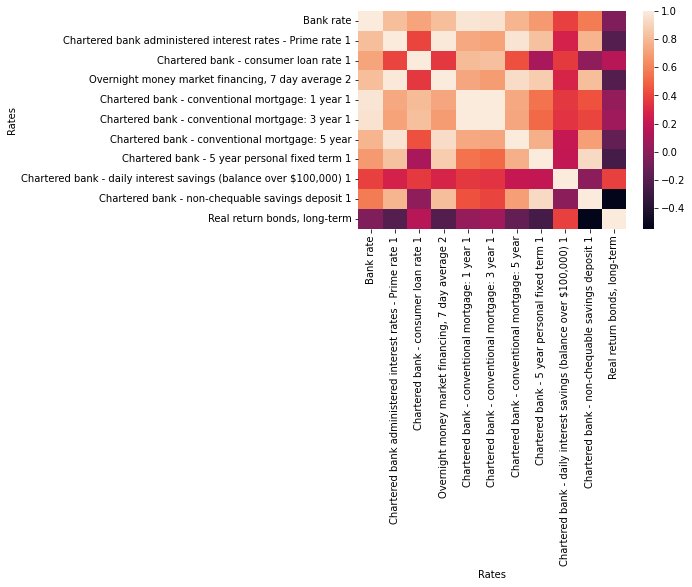

In [148]:
# plot the heatmap
corr = b_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [149]:
inf_data = pd.read_csv('Inflation_index_50y.csv',  skiprows=9)
inf_data

Alternative measures  \
0                                                 NaN   
1   Measure of core inflation based on a factor mo...   
2   Measure of core inflation based on a weighted ...   
3   Measure of core inflation based on a trimmed m...   
4                                                 NaN   
5   Consumer Price Index (CPI), all-items excludin...   
6   Consumer Price Index (CPI), all-items excludin...   
7   Consumer Price Index (CPI), all-items excludin...   
8   Consumer Price Index (CPI), all-items excludin...   
9   Consumer Price Index (CPI), all-items excludin...   
10  Consumer Price Index (CPI), all-items excludin...   
11                                                NaN   
12                                     Symbol legend:   
13                                                 ..   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                         Footnotes:   
19                                                  1   
20                                                  2   
21                                                  3   
22                                                  4   
23                                                  5   
24                                                  6   
25                                                  7   
26                                                  8   
27                                                  9   
28                                                 10   
29                                                NaN   
30                                                NaN   
31                                                NaN   
32  How to cite: Statistics Canada. Table 18-10-02...   
33  https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...   

                                               Feb-72  \
0                                             Percent   
1                                                  ..   
2                                                  ..   
3                                                  ..   
4                                            2002=100   
5                                                  ..   
6                                                22.4   
7                                                  ..   
8                                                  ..   
9                                                  ..   
10                                                 ..   
11                                                NaN   
12                                                NaN   
13      not available for a specific reference period   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19  From April 2020 to November 2021, and from Jan...   
20  For more information on the measures of core i...   
21  The Bank of Canada's preferred measures of cor...   
22  This measure is based on Consumer Price Index ...   
23  CPI-common is a measure of core inflation that...   
24  This measure is based on Consumer Price Index ...   
25  CPI-median is a measure of core inflation corr...   
26  CPI-trim is a measure of core inflation that e...   
27  Eight of the most volatile components identifi...   
28  Differences in historical data exist between t...   
29                                                NaN   
30                                                NaN   
31                                                NaN   
32                                                NaN   
33                                                NaN   

                                         

In [150]:
inf_data = inf_data.iloc[0:11,:].transpose()
inf_data.columns = inf_data.iloc[0]
inf_data = inf_data.iloc[1:,:]
inf_data

Alternative measures      NaN  \
Feb-72                Percent   
Mar-72                    NaN   
Apr-72                    NaN   
May-72                    NaN   
Jun-72                    NaN   
...                       ...   
May-22                    NaN   
Jun-22                    NaN   
Jul-22                    NaN   
Aug-22                    NaN   
Sep-22                    NaN   

Alternative measures Measure of core inflation based on a factor model, CPI-common (year-over-year percent change) 2 3 4 5  \
Feb-72                                                               ..                                                      
Mar-72                                                               ..                                                      
Apr-72                                                               ..                                                      
May-72                                                               ..                                                      
Jun-72                                                               ..                                                      
...                                                                 ...                                                      
May-22                                                              5.9                                                      
Jun-22                                                              6.1                                                      
Jul-22                                                              6.3                                                      
Aug-22                                                              6.0                                                      
Sep-22                                                              6.0                                                      

Alternative measures Measure of core inflation based on a weighted median approach, CPI-median (year-over-year percent change) 2 3 6 7  \
Feb-72                                                               ..                                                                  
Mar-72                                                               ..                                                                  
Apr-72                                                               ..                                                                  
May-72                                                               ..                                                                  
Jun-72                                                               ..                                                                  
...                                                                 ...                                                                  
May-22                                                              4.8                                                                  
Jun-22                                                              4.9                                                                  
Jul-22                                                              4.9                                                                  
Aug-22                                                              4.7                                                                  
Sep-22                                                              4.7                                                                  

Alternative measures Measure of core inflation based on a trimmed mean approach, CPI-trim (year-over-year percent change) 2 3 6 8  \
Feb-72                                                               ..                                                             
Mar-72                                                               ..                                                             
Apr-72                            

In [151]:
inf_data = inf_data.rename({'Consumer Price Index (CPI), all-items excluding eight of the most volatile components as defined by the Bank of Canada 9': 'Consumer Price Index (CPI)'}, axis=1)
inf_data

Alternative measures      NaN  \
Feb-72                Percent   
Mar-72                    NaN   
Apr-72                    NaN   
May-72                    NaN   
Jun-72                    NaN   
...                       ...   
May-22                    NaN   
Jun-22                    NaN   
Jul-22                    NaN   
Aug-22                    NaN   
Sep-22                    NaN   

Alternative measures Measure of core inflation based on a factor model, CPI-common (year-over-year percent change) 2 3 4 5  \
Feb-72                                                               ..                                                      
Mar-72                                                               ..                                                      
Apr-72                                                               ..                                                      
May-72                                                               ..                                                      
Jun-72                                                               ..                                                      
...                                                                 ...                                                      
May-22                                                              5.9                                                      
Jun-22                                                              6.1                                                      
Jul-22                                                              6.3                                                      
Aug-22                                                              6.0                                                      
Sep-22                                                              6.0                                                      

Alternative measures Measure of core inflation based on a weighted median approach, CPI-median (year-over-year percent change) 2 3 6 7  \
Feb-72                                                               ..                                                                  
Mar-72                                                               ..                                                                  
Apr-72                                                               ..                                                                  
May-72                                                               ..                                                                  
Jun-72                                                               ..                                                                  
...                                                                 ...                                                                  
May-22                                                              4.8                                                                  
Jun-22                                                              4.9                                                                  
Jul-22                                                              4.9                                                                  
Aug-22                                                              4.7                                                                  
Sep-22                                                              4.7                                                                  

Alternative measures Measure of core inflation based on a trimmed mean approach, CPI-trim (year-over-year percent change) 2 3 6 8  \
Feb-72                                                               ..                                                             
Mar-72                                                               ..                                                             
Apr-72                            

In [152]:
import datetime

In [153]:
# def convert_date(old_date):
#   return datetime.datetime.strptime(old_date, '%B %Y').strftime('%Y-%m')

In [154]:
CPI_data = inf_data[['Consumer Price Index (CPI)']]
#CPI_data = CPI_data.rename({0: 'inflation'}, axis= "rows")
# CPI_data = CPI_data.rename(lambda r: convert_date(r), axis= 'columns').T
CPI_data

Alternative measures Consumer Price Index (CPI)
Feb-72                                     22.4
Mar-72                                     22.5
Apr-72                                     22.6
May-72                                     22.5
Jun-72                                     22.5
...                                         ...
May-22                                    146.6
Jun-22                                    147.1
Jul-22                                    147.8
Aug-22                                    147.9
Sep-22                                    148.4

[608 rows x 1 columns]

In [155]:
CPI_data= CPI_data.astype(float)

In [156]:
CPI_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, Feb-72 to Sep-22
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Consumer Price Index (CPI)  608 non-null    float64
dtypes: float64(1)
memory usage: 9.5+ KB
